# **Harmonização , Integração e Análise dos Datasets Santos16 e dosSantos17** 

Esse notebook realiza a Harmonização dos datasets, possibilitando que os dados dos dois arquivos tenham a mesma padronização.  
Integração dos dados em parquet de Santos(16) e dosSantos(17) em um único arquivo.  
Após a criação do arquivo em parquet é feito uma breve análise dos dados 


## Setup

In [1]:
import duckdb 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D

In [2]:
db = duckdb.connect()

# Harmonização e Integração

## Abrindo os arquivos em Parquet pelo duckdb
Os datasets em parquet pode ser encontrados no Drive

In [3]:
file16 = r'D:\Datasets\Santos, Damiana (2016)\santos16.parquet'
db.execute(f"CREATE TABLE dados16 AS SELECT * FROM parquet_scan('{file16}')")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [4]:
file17 = r'D:\Datasets\dosSantos17\data\santos17grf.parquet'
db.execute(f"CREATE TABLE dados17 AS SELECT * FROM parquet_scan('{file17}')")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

## Lendo os arquvios

In [5]:
resultados = db.execute("SELECT * FROM dados16 Limit 5").fetchdf()
resultados

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,...,Date,Time,Fx,Fy,Fz,Mx,My,Mz,COPx,COPy
0,BDS00001,1,Open,Firm,33.0,Young,F,157.5,54.2,21.849332,...,2015-10-08 08:30:00.000,0.01,-1.633567,-3.739135,539.066061,5.383505,43.064851,-0.570876,-7.988789,0.998673
1,BDS00001,1,Open,Firm,33.0,Young,F,157.5,54.2,21.849332,...,2015-10-08 08:30:00.000,0.02,-1.631645,-3.755459,538.591198,5.373275,43.020015,-0.575349,-7.987508,0.997654
2,BDS00001,1,Open,Firm,33.0,Young,F,157.5,54.2,21.849332,...,2015-10-08 08:30:00.000,0.03,-1.628593,-3.762146,538.207318,5.367719,42.974805,-0.578670,-7.984805,0.997333
3,BDS00001,1,Open,Firm,33.0,Young,F,157.5,54.2,21.849332,...,2015-10-08 08:30:00.000,0.04,-1.623200,-3.753010,537.977214,5.369522,42.929275,-0.580162,-7.979757,0.998095
4,BDS00001,1,Open,Firm,33.0,Young,F,157.5,54.2,21.849332,...,2015-10-08 08:30:00.000,0.05,-1.613998,-3.727238,537.915946,5.378311,42.883767,-0.579954,-7.972206,0.999842


In [6]:
resultados = db.execute("SELECT * FROM dados17 Limit 5").fetchdf()
resultados

,Trial,Subject,Vision,Surface,Rep,Age,AgeGroup,Gender,Height,Mass,...,RCOP_Y,RCOP_Z,LCOP_X,LCOP_Y,LCOP_Z,COPNET_X,COPNET_Y,COPNET_Z,RFREEMOMENT_Y,LFREEMOMENT_Y
0,PDS01OR1,1,Open,Rigid,1,25.67,Young,M,1.72,74.3,...,0.0,0.093610,0.227590,0.0,-0.085100,0.231089,0.0,-0.002490,3.067748,-0.889998
1,PDS01OR1,1,Open,Rigid,1,25.67,Young,M,1.72,74.3,...,0.0,0.093502,0.227516,0.0,-0.085075,0.230965,0.0,-0.002571,3.058200,-0.873012
2,PDS01OR1,1,Open,Rigid,1,25.67,Young,M,1.72,74.3,...,0.0,0.093391,0.227458,0.0,-0.085064,0.230859,0.0,-0.002660,3.050973,-0.858668
3,PDS01OR1,1,Open,Rigid,1,25.67,Young,M,1.72,74.3,...,0.0,0.093278,0.227424,0.0,-0.085075,0.230782,0.0,-0.002755,3.047538,-0.849078
4,PDS01OR1,1,Open,Rigid,1,25.67,Young,M,1.72,74.3,...,0.0,0.093171,0.227413,0.0,-0.085108,0.230732,0.0,-0.002848,3.047990,-0.845515


## Analisando as duas tabelas

Numero de Linhas e Colunas 

In [7]:
query_colunas = "PRAGMA table_info ('dados16')"
query_linhas = "SELECT COUNT(*) FROM dados16"
result_colunas1 = db.execute(query_colunas).fetch_df()
result_linhas = db.execute(query_linhas).fetch_df()
num_colunas = result_colunas1.shape[0]
num_linhas = result_linhas.iloc[0, 0]
print(f'Número de colunas do dataset16 é {num_colunas}')
print(f'Número de linhas é dataset16 {num_linhas}')

Número de colunas do dataset16 é 73
Número de linhas é dataset16 11580000


Nome das Colunas dos datasets16

In [8]:
result_colunas1 = db.execute("PRAGMA table_info('dados16')").fetchall()
nomes_colunas = [row[1] for row in result_colunas1]
print('Os nomes das colunas são:')
for nome in nomes_colunas:
    print(nome)

Os nomes das colunas são:
Trial
Subject
Vision
Surface
Age
AgeGroup
Gender
Height
Weight
BMI
FootLen
Nationality
SkinColor
Ystudy
Footwear
Illness
Illness2
Nmedication
Medication
Ortho-Prosthesis
Ortho-Prosthesis2
Disability
Disability2
Falls12m
FES_1
FES_2
FES_3
FES_4
FES_5
FES_6
FES_7
FES_T
FES_S
IPAQ_1a
IPAQ_1b
IPAQ_2a
IPAQ_2b
IPAQ_3a
IPAQ_3b
IPAQ_4a
IPAQ_4b
IPAQ_S
TMT_timeA
TMT_errorsA
TMT_timeB
TMT_errorsB
Best_1
Best_2
Best_3l
Best_3r
Best_4
Best_5
Best_6l
Best_6r
Best_7
Best_8
Best_9
Best_10
Best_11
Best_12
Best_13
Best_14
Best_T
Date
Time
Fx
Fy
Fz
Mx
My
Mz
COPx
COPy


In [9]:
query_colunas = "PRAGMA table_info ('dados17')"
query_linhas = "SELECT COUNT(*) FROM dados17"
result_colunas = db.execute(query_colunas).fetch_df()
result_linhas = db.execute(query_linhas).fetch_df()
num_colunas = result_colunas.shape[0]
num_linhas = result_linhas.iloc[0, 0]
print(f'Número de colunas do dataset17 é {num_colunas}')
print(f'Número de linhas é dataset17 {num_linhas}')

Número de colunas do dataset17 é 50
Número de linhas é dataset17 3528000


Nome das colunas do dataset17

In [10]:
result_colunas = db.execute("PRAGMA table_info('dados17')").fetchall()
nomes_colunas = [row[1] for row in result_colunas]
print('Os nomes das colunas são:')
for nome in nomes_colunas:
    print(nome)


Os nomes das colunas são:
Trial
Subject
Vision
Surface
Rep
Age
AgeGroup
Gender
Height
Mass
BMI
FootLen
DominantLeg
Nationality
SkinColor
Ystudy
Footwear
Illness
Illness2
Nmedication
Medication
Ortho-Prosthesis
Ortho-Prosthesis2
Disability
Disability2
Falls12m
PhysicalActivity
Sequence
Date
Time
RGRF_X
RGRF_Y
RGRF_Z
LGRF_X
LGRF_Y
LGRF_Z
GRFNET_X
GRFNET_Y
GRFNET_Z
RCOP_X
RCOP_Y
RCOP_Z
LCOP_X
LCOP_Y
LCOP_Z
COPNET_X
COPNET_Y
COPNET_Z
RFREEMOMENT_Y
LFREEMOMENT_Y


Como as coletas de Santos16 e Santos17 foram coletados pela mesma equipe, já sabemos que há colunas em comum 

In [11]:
colunas_tabela1 = db.execute("PRAGMA table_info('dados16')").fetchall()
colunas_tabela1 = [coluna[1] for coluna in colunas_tabela1]

colunas_tabela2 = db.execute("PRAGMA table_info('dados17')").fetchall()
colunas_tabela2 = [coluna[1] for coluna in colunas_tabela2]

colunas_comuns = list(set(colunas_tabela1) & set(colunas_tabela2))

print(colunas_comuns)

['Footwear', 'Disability', 'Disability2', 'Time', 'SkinColor', 'Illness', 'Subject', 'Ortho-Prosthesis', 'Ortho-Prosthesis2', 'Nationality', 'BMI', 'Illness2', 'Trial', 'Height', 'Ystudy', 'FootLen', 'Nmedication', 'Medication', 'Age', 'Surface', 'Vision', 'AgeGroup', 'Falls12m', 'Date', 'Gender']


Visualização Total das colunas para comparação

In [12]:
linha_numero = 656000 +1
pd.set_option('display.max_columns', None)
resultado = db.execute(f"SELECT * FROM dados16 LIMIT 1 OFFSET {linha_numero}").fetch_df() # A função OFFSET é usada para pular as linhas e LImit é usado para limitar o número de linhas retornadas
resultado 

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,Nationality,SkinColor,Ystudy,Footwear,Illness,Illness2,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,FES_1,FES_2,FES_3,FES_4,FES_5,FES_6,FES_7,FES_T,FES_S,IPAQ_1a,IPAQ_1b,IPAQ_2a,IPAQ_2b,IPAQ_3a,IPAQ_3b,IPAQ_4a,IPAQ_4b,IPAQ_S,TMT_timeA,TMT_errorsA,TMT_timeB,TMT_errorsB,Best_1,Best_2,Best_3l,Best_3r,Best_4,Best_5,Best_6l,Best_6r,Best_7,Best_8,Best_9,Best_10,Best_11,Best_12,Best_13,Best_14,Best_T,Date,Time,Fx,Fy,Fz,Mx,My,Mz,COPx,COPy
0,BDS00110,10,Closed,Firm,26.166667,Young,F,162.7,49.1,18.548397,22.5,Brazil,White,13,Walking shoes,No,No,0,No,Yes,Corrective lens,No,No,1,1,1,1,1,1,1,1,7,Low Concern,6.0,20.0,0,0,0.0,0.0,10:00:00,12:00:00,Low,17.37,0.0,48.37,1.0,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,26,2015-10-16 14:13:05.608,20.02,3.079352,-1.128259,483.071763,-2.322003,17.005809,0.508446,-3.520348,-0.480675


In [13]:
linha_numero = 656000 +1
pd.set_option('display.max_columns', None)
resultado = db.execute(f"SELECT * FROM dados17 LIMIT 1 OFFSET {linha_numero}").fetch_df() # A função OFFSET é usada para pular as linhas e LImit é usado para limitar o número de linhas retornadas
resultado 

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Trial,Subject,Vision,Surface,Rep,Age,AgeGroup,Gender,Height,Mass,BMI,FootLen,DominantLeg,Nationality,SkinColor,Ystudy,Footwear,Illness,Illness2,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,PhysicalActivity,Sequence,Date,Time,RGRF_X,RGRF_Y,RGRF_Z,LGRF_X,LGRF_Y,LGRF_Z,GRFNET_X,GRFNET_Y,GRFNET_Z,RCOP_X,RCOP_Y,RCOP_Z,LCOP_X,LCOP_Y,LCOP_Z,COPNET_X,COPNET_Y,COPNET_Z,RFREEMOMENT_Y,LFREEMOMENT_Y
0,PDS10OR2,10,Open,Rigid,2,31.25,Young,F,1.62,61.7,23.45,22.85,Right,Colombia,Pardo/Brown,19,Walking shoes,Yes,Chodromalacia of the knees,0,No,No,No,No,No,0,2,"CF, OF, OR, CR",2016-08-17 10:34:51.218,20.01,-6.088875,295.470636,-24.768635,6.93757,307.485506,24.31609,0.848695,602.95616,-0.452545,0.248434,0.0,0.101683,0.226119,0.0,-0.094942,0.237052,0.0,0.001411,1.081445,-0.297528


## Unindo as Tabelas
Para dados17 precisamos fazer algumas exclusão nos dados, que divergem dos dados16 e procurar os seus semelhantes.  
Em relação a plataforma de força, queremos uma tabela com dados Fx,Fy,Fz,Mx,My,Mz,COPx,COPy,COPz


### Criando colunas nulas e faltantes na tabela  


In [14]:
db.execute("ALTER TABLE dados17 ADD COLUMN Mx FLOAT")

db.execute("ALTER TABLE dados17 ADD COLUMN My FLOAT")

db.execute("ALTER TABLE dados16 ADD COLUMN COPz FLOAT")

db.execute("ALTER TABLE dados17 ADD COLUMN Mz DOUBLE")


### Coordenadas dos COP
Na área de postura e equilíbrio, a convenção mais utilizada é x ânterio-posterior (+ para frente) e y médio-lateral (acho que + para direita).
 - x: ânterio-posterior (+ para frente);
 - y: médio-lateral (+ para esquerda);
 - z: vertical (+ para cima).


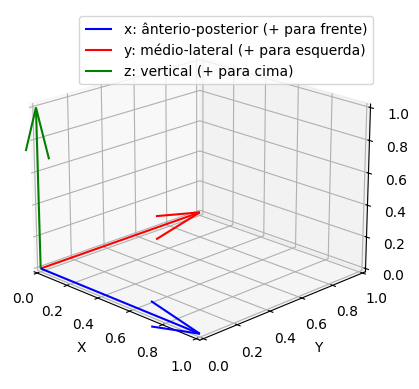

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

# Cria um eixo 3D
ax = fig.add_subplot(111, projection='3d')

# Inverte a direção do eixo Y
ax.invert_yaxis()

# Cria as linhas de direção
ax.quiver(0, 0, 0, 1, 0, 0, color='b', label='x: ânterio-posterior (+ para frente)')
ax.quiver(0, 0, 0, 0, 1, 0, color='r', label='y: médio-lateral (+ para esquerda)')
ax.quiver(0, 0, 0, 0, 0, 1, color='g', label='z: vertical (+ para cima)')

# Define os limites do gráfico
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Define os rótulos dos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adiciona a legenda
ax.legend()

# Ajusta a orientação dos eixos
ax.view_init(elev=20, azim=-45)  # Ajuste os ângulos aqui

# Mostra o gráfico
plt.show()

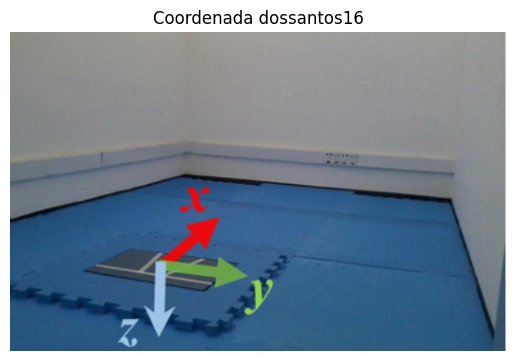

In [16]:
img = plt.imread(r"D:\Downloads HD\Imagens\Internet\coordenadasantos16.png")
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
plt.title("Coordenada dossantos16")
plt.show()

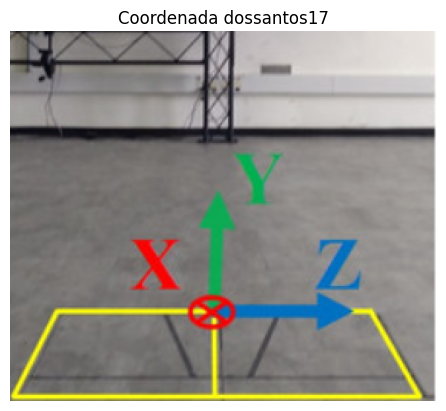

In [17]:
img = plt.imread(r"D:\Downloads HD\Imagens\Internet\coordenadadossantos17.png")
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
plt.title("Coordenada dossantos17")
plt.show()

#### Santos16:
 - x ok
 - y para -y
 - z para -z

In [18]:
db.execute("UPDATE dados16 SET Fy = Fy * -1")
db.execute("UPDATE dados16 SET Fz = Fz * -1")

In [19]:
db.execute("UPDATE dados16 SET COPy = COPy * -1")

In [20]:
db.execute("UPDATE dados16 SET My = My * -1")
db.execute("UPDATE dados16 SET Mz = Mz * -1")

### dosSantos17:
 - x ok
 - y para z
 - z para -y


In [21]:
db.execute("UPDATE dados17 SET GRFNET_Z = GRFNET_Z * -1")
db.execute("UPDATE dados17 SET  COPNET_Z =  COPNET_Z * -1")

In [22]:
db.execute("ALTER TABLE dados17 RENAME COLUMN GRFNET_X TO Fx")

db.execute("ALTER TABLE dados17 RENAME COLUMN GRFNET_Y TO Fz")

db.execute("ALTER TABLE dados17 RENAME COLUMN GRFNET_Z TO Fy")

In [23]:
db.execute("ALTER TABLE dados17 RENAME COLUMN COPNET_X TO COPx")

db.execute("ALTER TABLE dados17 RENAME COLUMN COPNET_Y TO COPz")

db.execute("ALTER TABLE dados17 RENAME COLUMN COPNET_Z TO COPy")

In [24]:
db.execute("UPDATE dados17 SET Mz = (RFREEMOMENT_Y + LFREEMOMENT_Y) ")

### Massa e altura

In [25]:
db.execute("ALTER TABLE dados17 RENAME COLUMN Mass TO Weight")

coluna 'Height' de cm para metros em santos 16


In [26]:
db.execute("UPDATE dados16 SET Height = Height / 100")

### Colocando os COPx e COPy de santos 16 de cm para m

In [27]:
db.execute("""
    UPDATE dados16 
    SET COPX = COPX / 100, COPY = COPY / 100
""")

db.commit()

### Mudando em dosSantos17 Rigid para Firm

In [28]:
db.execute("""
    UPDATE dados17
    SET Surface = REPLACE(Surface, 'Rigid', 'Firm')
    WHERE Surface = 'Rigid'
""")

db.commit()

### Criando nova coluna em santos16 e santos17 chamada SubjectT 
Essa coluna ira nos ajudar nas análises posteriores.  
Ela sera criada de maneira artificialmente, pois é menos custoso para a memoria ram, uma vez que já temos as informações que queremos 

In [29]:
db.execute("ALTER TABLE dados16 ADD COLUMN SubjectT INT")

In [30]:
db.execute("UPDATE dados16 SET SubjectT = Subject")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [31]:
db.execute("Select * from dados16 ORDER BY Subject LIMIT 5").fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,Nationality,SkinColor,Ystudy,Footwear,Illness,Illness2,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,FES_1,FES_2,FES_3,FES_4,FES_5,FES_6,FES_7,FES_T,FES_S,IPAQ_1a,IPAQ_1b,IPAQ_2a,IPAQ_2b,IPAQ_3a,IPAQ_3b,IPAQ_4a,IPAQ_4b,IPAQ_S,TMT_timeA,TMT_errorsA,TMT_timeB,TMT_errorsB,Best_1,Best_2,Best_3l,Best_3r,Best_4,Best_5,Best_6l,Best_6r,Best_7,Best_8,Best_9,Best_10,Best_11,Best_12,Best_13,Best_14,Best_T,Date,Time,Fx,Fy,Fz,Mx,My,Mz,COPx,COPy,COPz,SubjectT
0,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,1,1,1,1,1,1,1,7,Low Concern,7.0,120.0,2,90,3.0,30.0,05:00:00,04:00:00,High,14.06,0.0,19.69,0.0,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000,0.01,-1.633567,3.739135,-539.066061,5.383505,-43.064851,0.570876,-0.079888,-0.009987,NaN,1
1,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,1,1,1,1,1,1,1,7,Low Concern,7.0,120.0,2,90,3.0,30.0,05:00:00,04:00:00,High,14.06,0.0,19.69,0.0,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000,0.02,-1.631645,3.755459,-538.591198,5.373275,-43.020015,0.575349,-0.079875,-0.009977,NaN,1
2,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,1,1,1,1,1,1,1,7,Low Concern,7.0,120.0,2,90,3.0,30.0,05:00:00,04:00:00,High,14.06,0.0,19.69,0.0,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000,0.03,-1.628593,3.762146,-538.207318,5.367719,-42.974805,0.578670,-0.079848,-0.009973,NaN,1
3,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,1,1,1,1,1,1,1,7,Low Concern,7.0,120.0,2,90,3.0,30.0,05:00:00,04:00:00,High,14.06,0.0,19.69,0.0,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000,0.04,-1.623200,3.753010,-537.977214,5.369522,-42.929275,0.580162,-0.079798,-0.009981,NaN,1
4,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,1,1,1,1,1,1,1,7,Low Concern,7.0,120.0,2,90,3.0,30.0,05:00:00,04:00:00,High,14.06,0.0,19.69,0.0,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000,0.05,-1.613998,3.727238,-537.915946,5.378311,-42.883767,0.579954,-0.079722,-0.009998,NaN,1


In [32]:
db.execute("ALTER TABLE dados17 ADD COLUMN SubjectT INTEGER")

In [33]:
db.execute("UPDATE dados17 SET SubjectT = Subject + 163")

In [34]:
db.execute("Select * from dados17 LIMIT 5").fetchdf()

,Trial,Subject,Vision,Surface,Rep,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,DominantLeg,Nationality,SkinColor,Ystudy,Footwear,Illness,Illness2,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,PhysicalActivity,Sequence,Date,Time,RGRF_X,RGRF_Y,RGRF_Z,LGRF_X,LGRF_Y,LGRF_Z,Fx,Fz,Fy,RCOP_X,RCOP_Y,RCOP_Z,LCOP_X,LCOP_Y,LCOP_Z,COPx,COPz,COPy,RFREEMOMENT_Y,LFREEMOMENT_Y,Mx,My,Mz,SubjectT
0,PDS01OR1,1,Open,Firm,1,25.67,Young,M,1.72,74.3,24.97,25.3,Left,Peru,Indigenous,17,Walking shoes,Yes,Asthma,0,No,Yes,Corrective lens,No,No,0,1,"OR, OF, CF, CR",2016-08-01 11:00:17.753,0.00,-4.975317,343.442977,1.630255,-2.570609,399.550464,6.340780,-7.545925,742.993431,-7.971034,0.235159,0.0,0.093610,0.227590,0.0,-0.085100,0.231089,0.0,0.002490,3.067748,-0.889998,NaN,NaN,2.177750,164
1,PDS01OR1,1,Open,Firm,1,25.67,Young,M,1.72,74.3,24.97,25.3,Left,Peru,Indigenous,17,Walking shoes,Yes,Asthma,0,No,Yes,Corrective lens,No,No,0,1,"OR, OF, CF, CR",2016-08-01 11:00:17.753,0.01,-5.045767,343.065892,1.563867,-2.520576,399.510123,6.265814,-7.566342,742.576007,-7.829683,0.234981,0.0,0.093502,0.227516,0.0,-0.085075,0.230965,0.0,0.002571,3.058200,-0.873012,NaN,NaN,2.185188,164
2,PDS01OR1,1,Open,Firm,1,25.67,Young,M,1.72,74.3,24.97,25.3,Left,Peru,Indigenous,17,Walking shoes,Yes,Asthma,0,No,Yes,Corrective lens,No,No,0,1,"OR, OF, CF, CR",2016-08-01 11:00:17.753,0.02,-5.095849,342.724598,1.503648,-2.496052,399.490305,6.198898,-7.591898,742.214895,-7.702550,0.234826,0.0,0.093391,0.227458,0.0,-0.085064,0.230859,0.0,0.002660,3.050973,-0.858668,NaN,NaN,2.192305,164
3,PDS01OR1,1,Open,Firm,1,25.67,Young,M,1.72,74.3,24.97,25.3,Left,Peru,Indigenous,17,Walking shoes,Yes,Asthma,0,No,Yes,Corrective lens,No,No,0,1,"OR, OF, CF, CR",2016-08-01 11:00:17.753,0.03,-5.110877,342.462170,1.456509,-2.507628,399.507641,6.144387,-7.618501,741.969800,-7.600900,0.234703,0.0,0.093278,0.227424,0.0,-0.085075,0.230782,0.0,0.002755,3.047538,-0.849078,NaN,NaN,2.198460,164
4,PDS01OR1,1,Open,Firm,1,25.67,Young,M,1.72,74.3,24.97,25.3,Left,Peru,Indigenous,17,Walking shoes,Yes,Asthma,0,No,Yes,Corrective lens,No,No,0,1,"OR, OF, CF, CR",2016-08-01 11:00:17.753,0.04,-5.086409,342.328557,1.429917,-2.544515,399.572613,6.102024,-7.630921,741.901155,-7.531945,0.234610,0.0,0.093171,0.227413,0.0,-0.085108,0.230732,0.0,0.002848,3.047990,-0.845515,NaN,NaN,2.202475,164


Vizualizando a Tabelas modificada

In [35]:
linha_numero = 656000 +1
pd.set_option('display.max_columns', None)
resultado = db.execute(f"SELECT * FROM dados17 LIMIT 1 OFFSET {linha_numero}").fetch_df() 
resultado 

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Trial,Subject,Vision,Surface,Rep,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,DominantLeg,Nationality,SkinColor,Ystudy,Footwear,Illness,Illness2,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,PhysicalActivity,Sequence,Date,Time,RGRF_X,RGRF_Y,RGRF_Z,LGRF_X,LGRF_Y,LGRF_Z,Fx,Fz,Fy,RCOP_X,RCOP_Y,RCOP_Z,LCOP_X,LCOP_Y,LCOP_Z,COPx,COPz,COPy,RFREEMOMENT_Y,LFREEMOMENT_Y,Mx,My,Mz,SubjectT
0,PDS10OR2,10,Open,Firm,2,31.25,Young,F,1.62,61.7,23.45,22.85,Right,Colombia,Pardo/Brown,19,Walking shoes,Yes,Chodromalacia of the knees,0,No,No,No,No,No,0,2,"CF, OF, OR, CR",2016-08-17 10:34:51.218,20.01,-6.088875,295.470636,-24.768635,6.93757,307.485506,24.31609,0.848695,602.95616,0.452545,0.248434,0.0,0.101683,0.226119,0.0,-0.094942,0.237052,0.0,-0.001411,1.081445,-0.297528,NaN,NaN,0.783917,173


Conferindo as colunas iguais 

In [36]:
colunas_tabela1 = db.execute("PRAGMA table_info('dados16')").fetchall()
colunas_tabela1 = [coluna[1] for coluna in colunas_tabela1]

colunas_tabela2 = db.execute("PRAGMA table_info('dados17')").fetchall()
colunas_tabela2 = [coluna[1] for coluna in colunas_tabela2]

colunas_comuns = list(set(colunas_tabela1) & set(colunas_tabela2))

print(colunas_comuns)

['Footwear', 'Disability', 'Fx', 'Disability2', 'Weight', 'Time', 'Fz', 'SkinColor', 'Illness', 'COPy', 'Subject', 'Ortho-Prosthesis', 'Ortho-Prosthesis2', 'My', 'Nationality', 'BMI', 'COPz', 'Illness2', 'SubjectT', 'Trial', 'Height', 'Ystudy', 'FootLen', 'Nmedication', 'Medication', 'AgeGroup', 'COPx', 'Age', 'Surface', 'Vision', 'Mz', 'Mx', 'Fy', 'Falls12m', 'Date', 'Gender']


_Juntando as Tabelas_

In [37]:
colunas = db.execute("""
    SELECT column_name 
    FROM information_schema.columns 
    WHERE table_name = 'dados16' 
    AND column_name IN (
        SELECT column_name 
        FROM information_schema.columns 
        WHERE table_name = 'dados17'
    )
""").fetchall()
colunas = ['"' + tupla[0] + '"' for tupla in colunas]
colunas_sql = ', '.join(colunas)
sql = f"""
    CREATE TABLE dados16_17 AS
    SELECT {colunas_sql} FROM dados16
    UNION ALL
    SELECT {colunas_sql} FROM dados17
"""
db.execute(sql)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [38]:

resultado = db.execute(f"SELECT * FROM dados16_17 where Trial = 'PDS10OR2' LIMIT 5").fetch_df() 
resultado 

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,Nationality,SkinColor,Ystudy,Footwear,Illness,Illness2,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,Date,Time,Fx,Fy,Fz,Mx,My,Mz,COPx,COPy,COPz,SubjectT
0,PDS10OR2,10,Open,Firm,31.25,Young,F,1.62,61.7,23.45,22.85,Colombia,Pardo/Brown,19,Walking shoes,Yes,Chodromalacia of the knees,0,No,No,No,No,No,0,2016-08-17 10:34:51.218,0.00,0.271258,0.843036,603.061300,NaN,NaN,0.957618,0.234110,0.002880,0.0,173
1,PDS10OR2,10,Open,Firm,31.25,Young,F,1.62,61.7,23.45,22.85,Colombia,Pardo/Brown,19,Walking shoes,Yes,Chodromalacia of the knees,0,No,No,No,No,No,0,2016-08-17 10:34:51.218,0.01,0.128972,0.677231,603.293354,NaN,NaN,0.936852,0.234299,0.002666,0.0,173
2,PDS10OR2,10,Open,Firm,31.25,Young,F,1.62,61.7,23.45,22.85,Colombia,Pardo/Brown,19,Walking shoes,Yes,Chodromalacia of the knees,0,No,No,No,No,No,0,2016-08-17 10:34:51.218,0.02,0.027350,0.535910,603.489639,NaN,NaN,0.915474,0.234458,0.002476,0.0,173
3,PDS10OR2,10,Open,Firm,31.25,Young,F,1.62,61.7,23.45,22.85,Colombia,Pardo/Brown,19,Walking shoes,Yes,Chodromalacia of the knees,0,No,No,No,No,No,0,2016-08-17 10:34:51.218,0.03,-0.009871,0.433869,603.645260,NaN,NaN,0.894264,0.234567,0.002325,0.0,173
4,PDS10OR2,10,Open,Firm,31.25,Young,F,1.62,61.7,23.45,22.85,Colombia,Pardo/Brown,19,Walking shoes,Yes,Chodromalacia of the knees,0,No,No,No,No,No,0,2016-08-17 10:34:51.218,0.04,0.016462,0.374236,603.794113,NaN,NaN,0.875968,0.234617,0.002217,0.0,173


In [39]:
resultado = db.execute(f"SELECT * FROM dados16_17 where Trial = 'BDS00110' LIMIT 5").fetch_df() 
resultado 

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,Nationality,SkinColor,Ystudy,Footwear,Illness,Illness2,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,Date,Time,Fx,Fy,Fz,Mx,My,Mz,COPx,COPy,COPz,SubjectT
0,BDS00110,10,Closed,Firm,26.166667,Young,F,1.627,49.1,18.548397,22.5,Brazil,White,13,Walking shoes,No,No,0,No,Yes,Corrective lens,No,No,1,2015-10-16 14:13:05.608,0.01,3.809926,1.379712,-482.093639,-1.510592,-16.542987,-0.537043,-0.034315,0.003133,NaN,10
1,BDS00110,10,Closed,Firm,26.166667,Young,F,1.627,49.1,18.548397,22.5,Brazil,White,13,Walking shoes,No,No,0,No,Yes,Corrective lens,No,No,1,2015-10-16 14:13:05.608,0.02,3.812614,1.302895,-482.160023,-1.485006,-16.543364,-0.544323,-0.034311,0.003080,NaN,10
2,BDS00110,10,Closed,Firm,26.166667,Young,F,1.627,49.1,18.548397,22.5,Brazil,White,13,Walking shoes,No,No,0,No,Yes,Corrective lens,No,No,1,2015-10-16 14:13:05.608,0.03,3.812393,1.236389,-482.249591,-1.456800,-16.543631,-0.550519,-0.034305,0.003021,NaN,10
3,BDS00110,10,Closed,Firm,26.166667,Young,F,1.627,49.1,18.548397,22.5,Brazil,White,13,Walking shoes,No,No,0,No,Yes,Corrective lens,No,No,1,2015-10-16 14:13:05.608,0.04,3.807863,1.186392,-482.378633,-1.423920,-16.543256,-0.554801,-0.034295,0.002952,NaN,10
4,BDS00110,10,Closed,Firm,26.166667,Young,F,1.627,49.1,18.548397,22.5,Brazil,White,13,Walking shoes,No,No,0,No,Yes,Corrective lens,No,No,1,2015-10-16 14:13:05.608,0.05,3.799270,1.152609,-482.549085,-1.385446,-16.541569,-0.556747,-0.034280,0.002871,NaN,10


In [40]:
query_colunas = "PRAGMA table_info ('dados16_17')"
query_linhas = "SELECT COUNT(*) FROM dados16_17"
result_colunas = db.execute(query_colunas).fetch_df()
result_linhas = db.execute(query_linhas).fetch_df()
num_colunas = result_colunas.shape[0]
num_linhas = result_linhas.iloc[0, 0]
print(f'Número de colunas é {num_colunas}')
print(f'Número de linhas é {num_linhas}')

Número de colunas é 36
Número de linhas é 15108000


## Salvando o arquivo em parquet
O Arquivo em parquet já está disponível no drive 

In [41]:
query = db.execute("""COPY
                   (FROM dados16_17) 
                   TO 'dados16_17.parquet'(FORMAT 'parquet', COMPRESSION 'zstd')""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
db.execute("""Select * 
           from read_parquet('dados16_17.parquet')
           limit 5""").fetchdf()

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,Nationality,SkinColor,Ystudy,Footwear,Illness,Illness2,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,Date,Time,Fx,Fy,Fz,Mx,My,Mz,COPx,COPy,COPz,SubjectT
0,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2015-10-08 08:30:00.000,0.01,-1.633567,3.739135,-539.066061,5.383505,-43.064851,0.570876,-7.988789,-0.998673,NaN,1
1,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2015-10-08 08:30:00.000,0.02,-1.631645,3.755459,-538.591198,5.373275,-43.020015,0.575349,-7.987508,-0.997654,NaN,1
2,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2015-10-08 08:30:00.000,0.03,-1.628593,3.762146,-538.207318,5.367719,-42.974805,0.578670,-7.984805,-0.997333,NaN,1
3,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2015-10-08 08:30:00.000,0.04,-1.623200,3.753010,-537.977214,5.369522,-42.929275,0.580162,-7.979757,-0.998095,NaN,1
4,BDS00001,1,Open,Firm,33.0,Young,F,1.575,54.2,21.849332,21.8,Brazil,Yellow,17,Flip-Flops,Yes,Hypothyroidism,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2015-10-08 08:30:00.000,0.05,-1.613998,3.727238,-537.915946,5.378311,-42.883767,0.579954,-7.972206,-0.999842,NaN,1


# Análise do Conjunto de Dados criado 

### Numero de Sujeitos

In [ ]:
query = db.execute("""
    SELECT AgeGroup, Gender, COUNT(*) as Subjects
    FROM (
        SELECT AgeGroup, Gender, Subject,
               CASE WHEN COALESCE(LAG(Subject, 1) OVER (), 0) != Subject THEN 1 ELSE 0 END as NewSubject
        FROM read_parquet('dados16_17.parquet')
    ) t
    WHERE NewSubject = 1
    GROUP BY AgeGroup, Gender
    ORDER BY CASE WHEN AgeGroup = 'Old' THEN 1 ELSE 2 END, Gender
""").fetchdf()
query


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,AgeGroup,Gender,Subjects
0,Old,F,71
1,Old,M,27
2,Young,F,68
3,Young,M,46


Também podemos fazer usando a coluna criada SubjectT

In [ ]:
query = """
    SELECT AgeGroup, Gender, COUNT(DISTINCT SubjectT) as Subjects
    FROM read_parquet('dados16_17.parquet')
    GROUP BY AgeGroup, Gender
    ORDER BY CASE WHEN AgeGroup = 'Old' THEN 1 ELSE 2 END, Gender
"""

result = db.execute(query).fetchdf()
result

,AgeGroup,Gender,Subjects
0,Old,F,71
1,Old,M,27
2,Young,F,68
3,Young,M,46


### Deficiencias e Doenças


In [ ]:
query = db.execute("""
    SELECT AgeGroup, Disability, Illness, count(*) as Subject
    FROM (
        SELECT AgeGroup, Disability, Illness, Subject,
        CASE WHEN COALESCE(LAG(Subject, 1) OVER (), 0) != Subject THEN 1 ELSE 0 END as NewSubject
        FROM read_parquet('dados16_17.parquet')
    ) t
    WHERE NewSubject = 1
    GROUP BY AgeGroup, Disability, Illness
    ORDER BY CASE WHEN AgeGroup = 'Old' THEN 1 ELSE 2 END, Disability, Illness
""").fetchdf()
query

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,AgeGroup,Disability,Illness,Subject
0,Old,No,No,10
1,Old,No,Yes,70
2,Old,Yes,No,1
3,Old,Yes,Yes,17
4,Young,No,No,63
5,Young,No,Yes,46
6,Young,Yes,No,2
7,Young,Yes,Yes,3


Usando a coluna SubjectT

In [ ]:
query = db.execute("""
    SELECT AgeGroup, Disability, Illness, count(Distinct SubjectT) as Subject
    FROM read_parquet('dados16_17.parquet')
    GROUP BY AgeGroup, Disability, Illness
    ORDER BY CASE WHEN AgeGroup = 'Old' THEN 1 ELSE 2 END, Disability, Illness
""").fetchdf()
query

,AgeGroup,Disability,Illness,Subject
0,Old,No,No,10
1,Old,No,Yes,70
2,Old,Yes,No,1
3,Old,Yes,Yes,17
4,Young,No,No,63
5,Young,No,Yes,46
6,Young,Yes,No,2
7,Young,Yes,Yes,3


In [ ]:
query = db.execute("""
    SELECT AgeGroup, COUNT(*) as Falls12M
    FROM (
        SELECT AgeGroup, Subject,
        CASE WHEN COALESCE(LAG(Subject, 1) OVER (), 0) != Subject THEN 1 ELSE 0 END as NewSubject
        FROM read_parquet('dados16_17.parquet')
        WHERE Falls12M > 0
    ) t
    WHERE NewSubject = 1
    GROUP BY AgeGroup
    ORDER BY CASE WHEN AgeGroup = 'Old' THEN 1 ELSE 2 END
""").fetchdf()
query

,AgeGroup,Falls12M
0,Old,26
1,Young,27


### Visualizando a Idade, altura, peso, e BMI 



Criando a tabela para fazer os gráficos 

In [ ]:
db.execute("CREATE TABLE dados16and17 AS SELECT * FROM read_parquet('dados16_17.parquet')")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
info = db.execute("SELECT Distinct Age, Gender, Height, Weight, BMI FROM dados16and17 ").fetchdf()


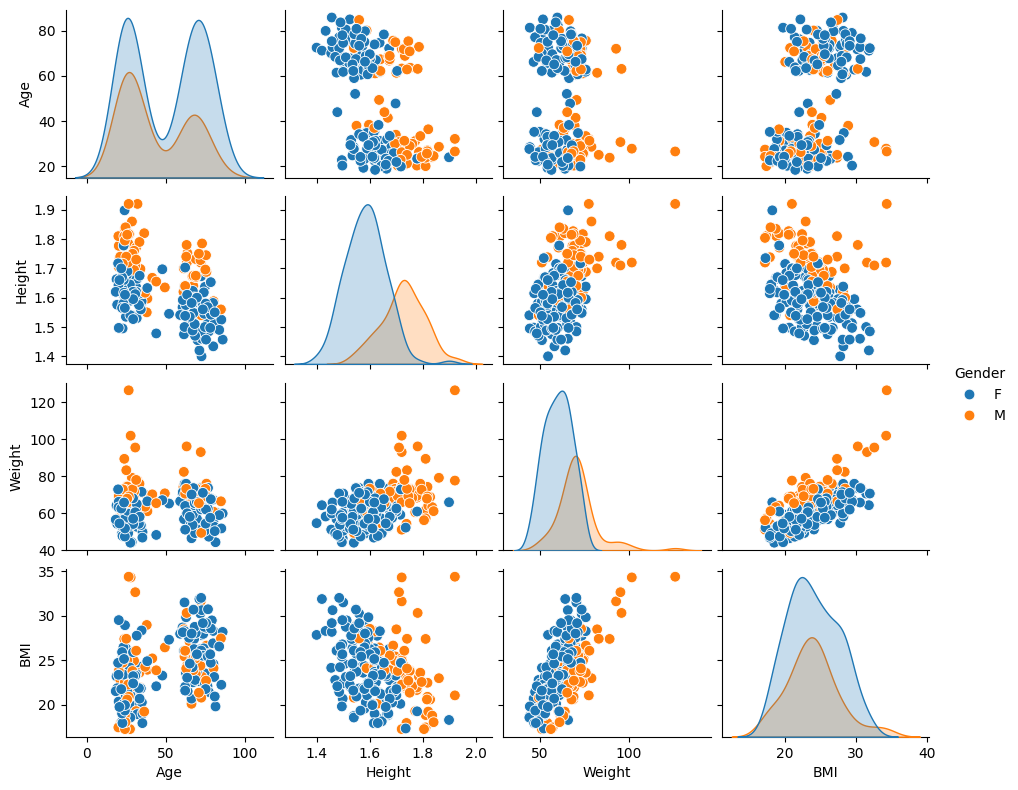

In [ ]:
sns.pairplot(info, hue='Gender', height=2, aspect=1.2, plot_kws={'s':60})
plt.show()

### _Avaliação Quantitativa BDS_
Aqui está um exemplo do gráfico 6 sinais (3 forças, 1 momento de força e 2 COPs) do primeiro ensaio do primeiro sujeito:

In [42]:
grf = db.execute("SELECT Time, Fx, Fy, Fz, COPx, COPy, My FROM read_parquet('dados16_17.parquet') WHERE Trial = 'BDS00038'").fetchdf()

In [43]:
def bdb_plot_grf(grf):
    
    Funits = 'N'
    Munits = 'Nm'
    COPunits = 'cm'
    t, Fx, Fy, Fz, COPx, COPy, My = [_ for _ in grf.values.T]
    plt.figure(figsize=(12, 7))

    COPx = COPx * 100
    COPy = COPy * 100

    gs1 = gridspec.GridSpec(3, 2)
    gs1.update(bottom=0.5, top=0.95, hspace=0.12, wspace=.15)
    ax1 = plt.subplot(gs1[0, 0])
    ax2 = plt.subplot(gs1[1, 0])
    ax3 = plt.subplot(gs1[2, 0])
    ax5 = plt.subplot(gs1[1, 1])

    gs2 = gridspec.GridSpec(3, 3)
    gs2.update(bottom=0.08, top=0.42, wspace=0.25)
    ax7 = plt.subplot(gs2[:, :-1])
    ax8 = plt.subplot(gs2[:, 2])

    ax1.set_ylabel('Fx (%s)' %Funits)
    ax1.set_xticklabels([]), ax1.locator_params(axis='y', nbins=4)
    ax1.yaxis.set_label_coords(-.14, 0.5)
    ax2.set_ylabel('Fy (%s)' %Funits)
    ax2.set_xticklabels([]), ax2.locator_params(axis='y', nbins=4)
    ax2.yaxis.set_label_coords(-.14, 0.5)
    ax3.set_ylabel('Fz (%s)' %Funits)
    ax3.locator_params(axis='y', nbins=4)
    ax3.yaxis.set_label_coords(-.14, 0.5)
    ax3.set_xlabel('Time (s)')
    ax5.set_ylabel('My (%s)' %Munits)
    ax5.set_xticklabels([]), ax5.locator_params(axis='y', nbins=4)
    ax5.yaxis.set_label_coords(-.1, 0.5)

    
    ax7.set_xlabel('Time (s)')
    ax7.set_ylabel('COP (%s)' %COPunits)
    ax8.set_xlabel('COPml (%s)' %COPunits)
    ax8.set_ylabel('COPap (%s)' %COPunits)

    ax1.plot(t, Fx)
    ax2.plot(t, Fy)
    ax3.plot(t, Fz)
    ax5.plot(t, My)
    ax7.plot(t, COPx, 'b', label='COP ap')
    ax7.plot(t, COPy, 'r', label='COP ml')
    ax7.yaxis.set_label_coords(-.1, 0.5)
    ax7.legend(fontsize=10, loc='best', framealpha=.5)
    ax8.plot(COPy, COPx)
    ax8.locator_params(axis='both', nbins=5)
    plt.suptitle('Forças de reação do solo durante a postura quieta', fontsize=18, y=1)

    plt.show()

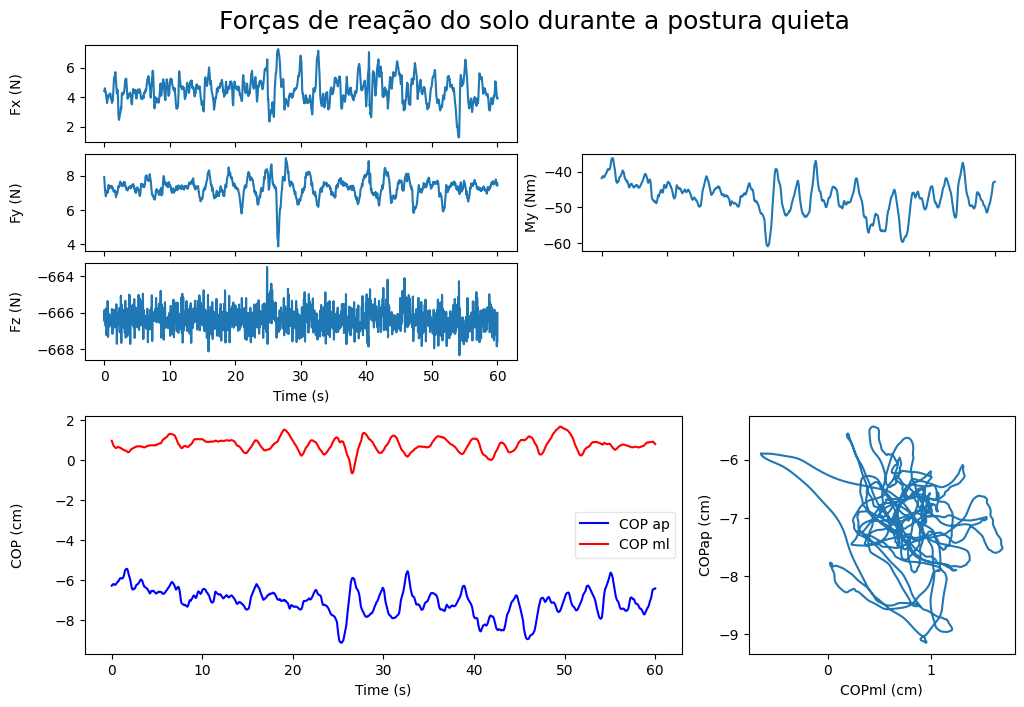

In [44]:
bdb_plot_grf(grf)

### _Avaliação Quantitativa de Trial com condição de estabilização CF (Olhos fechados e com espuma) na segunda repetição_

#### Gráficos de Forças, COP e Momento

In [45]:
grf = db.execute("SELECT Time, Fx, Fy, Fz, COPx, COPy, Mz FROM read_parquet('dados16_17.parquet') WHERE Trial = 'PDS02CF2'").fetchdf()

In [46]:
def bdb_plot_grf(grf):
    
    Funits = 'N'
    Munits = 'Nm'
    COPunits = 'cm'
    t, Fx, Fy, Fz, COPx, COPy, Mz = [_ for _ in grf.values.T]
    plt.figure(figsize=(12, 7))

    COPx = COPx * 100
    COPy = COPy * 100

    gs1 = gridspec.GridSpec(3, 2)
    gs1.update(bottom=0.5, top=0.95, hspace=0.12, wspace=.15)
    ax1 = plt.subplot(gs1[0, 0])
    ax2 = plt.subplot(gs1[1, 0])
    ax3 = plt.subplot(gs1[2, 0])
    ax5 = plt.subplot(gs1[1, 1])

    gs2 = gridspec.GridSpec(3, 3)
    gs2.update(bottom=0.08, top=0.42, wspace=0.25)
    ax7 = plt.subplot(gs2[:, :-1])
    ax8 = plt.subplot(gs2[:, 2])

    ax1.set_ylabel('Fx (%s)' %Funits)
    ax1.set_xticklabels([]), ax1.locator_params(axis='y', nbins=4)
    ax1.yaxis.set_label_coords(-.14, 0.5)
    ax2.set_ylabel('Fy (%s)' %Funits)
    ax2.set_xticklabels([]), ax2.locator_params(axis='y', nbins=4)
    ax2.yaxis.set_label_coords(-.14, 0.5)
    ax3.set_ylabel('Fz (%s)' %Funits)
    ax3.locator_params(axis='y', nbins=4)
    ax3.yaxis.set_label_coords(-.14, 0.5)
    ax3.set_xlabel('Time (s)')
    ax5.set_ylabel('Mz (%s)' %Munits)
    ax5.set_xticklabels([]), ax5.locator_params(axis='y', nbins=4)
    ax5.yaxis.set_label_coords(-.1, 0.5)

    
    ax7.set_xlabel('Time (s)')
    ax7.set_ylabel('COP (%s)' %COPunits)
    ax8.set_xlabel('COPml (%s)' %COPunits)
    ax8.set_ylabel('COPap (%s)' %COPunits)

    ax1.plot(t, Fx)
    ax2.plot(t, Fy)
    ax3.plot(t, Fz)
    ax5.plot(t, Mz)
    ax7.plot(t, COPx, 'b', label='COP ap')
    ax7.plot(t, COPy, 'r', label='COP ml')
    ax7.yaxis.set_label_coords(-.1, 0.5)
    ax7.legend(fontsize=10, loc='best', framealpha=.5)
    ax8.plot(COPy, COPx)
    ax8.locator_params(axis='both', nbins=5)
    plt.suptitle('Forças de reação do solo com sujeito de olhos fechados e com espuma', fontsize=18, y=1)

    plt.show()

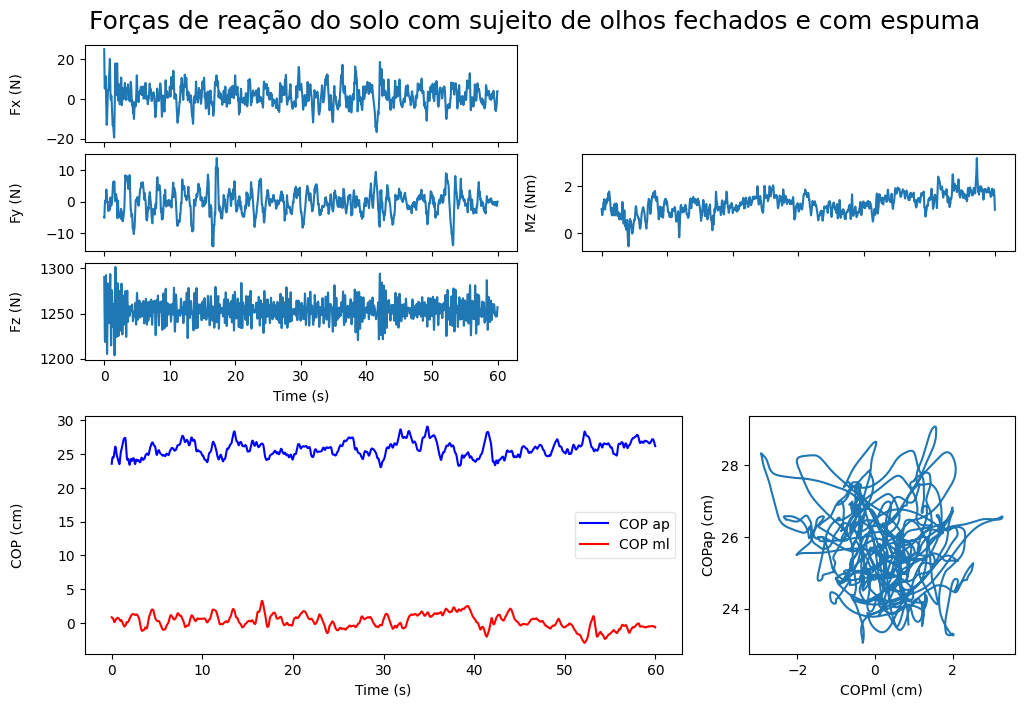

In [47]:
bdb_plot_grf(grf)

#### Deslocamentos COP 
Vamos carregar a plataforma de força e os dados cinemáticos de um sujeito de PSD

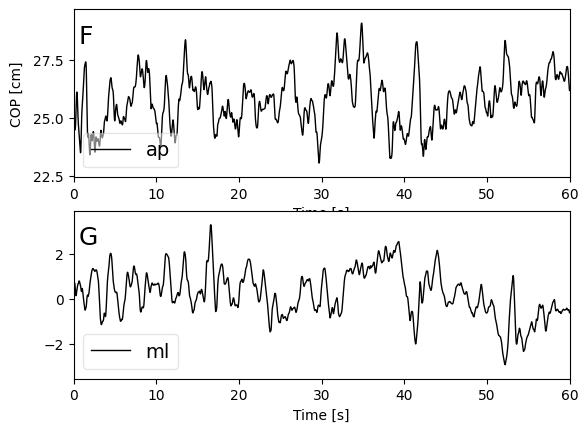

In [ ]:
    
grf = db.execute("SELECT Time, COPx, COPy FROM  read_parquet('dados16_17.parquet') WHERE Trial = 'PDS02CF2'").fetchdf()

# Criar os gráficos
fig, (ax5, ax6) = plt.subplots(2, 1)

ax5.plot(grf['Time'], grf['COPx']*100, 'k', linewidth=1.0, label='ap')
ax5.margins(y=0.1)
ax5.set_xlim([0, 60])
ax5.set_xlabel('Time [s]')
ax5.set_ylabel('COP [cm]')
ax5.locator_params(axis='y', nbins=3)
ax5.yaxis.set_label_coords(-.1, 0.5)
ax5.legend(fontsize=14, loc='lower left', framealpha=.5)
ax5.text(0.01, 0.8, 'F', transform=ax5.transAxes, fontsize=18)

ax6.plot(grf['Time'], grf['COPy']*100, 'k', linewidth=1.0, label='ml')
ax6.margins(y=0.1)
ax6.set_xlim([0, 60])
ax6.set_xlabel('Time [s]')
ax6.locator_params(axis='y', nbins=4)
ax6.legend(fontsize=14, loc='lower left', framealpha=.5)
ax6.text(0.01, 0.8, 'G', transform=ax6.transAxes, fontsize=18)

plt.show()

### Analisando média das COP por idade entre os dois dados

In [53]:
query = """
SELECT Age, AVG(COPx) as MediaCOPx, AVG(COPy) as MediaCOPy
FROM read_parquet('dados16_17.parquet')
WHERE Vision = 'Closed' AND Surface = 'Firm'
GROUP BY Age
ORDER BY Age""" 
df = db.execute(query).fetchdf()

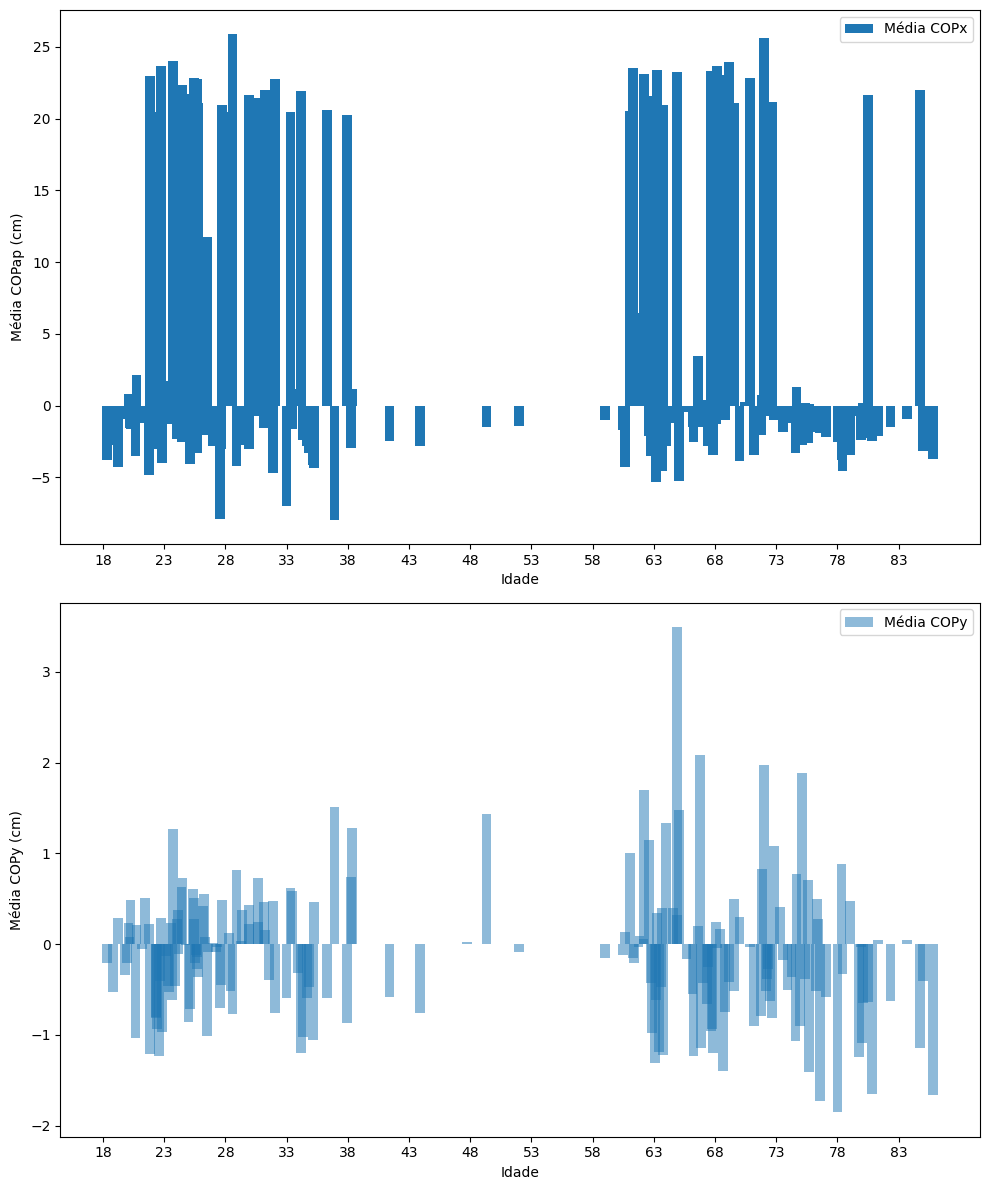

In [54]:
fig, axs = plt.subplots(2, figsize=(10, 12))

axs[0].bar(df['Age'], df['MediaCOPx']*100, label='Média COPx')
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Média COPap (cm)')
axs[0].legend()
axs[0].set_xticks(range(int(min(df['Age'])), int(max(df['Age']))+1, 5))  # Mostra apenas a cada 5 anos

axs[1].bar(df['Age'], df['MediaCOPy']*100, label='Média COPy', alpha=0.5)
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Média COPy (cm)')
axs[1].legend()
axs[1].set_xticks(range(int(min(df['Age'])), int(max(df['Age']))+1, 5))  # Mostra apenas a cada 5 anos

plt.tight_layout()
plt.show()

### Comparando os dados coletados em um sujeito PDS e BDS em condições de olhos abertos e superfine rígida    

In [60]:

grf1 = db.execute("SELECT Time, COPx, COPy, SubjectT FROM  read_parquet('dados16_17.parquet') where Trial = 'BDS00001' ").fetchdf()
grf2 = db.execute("SELECT Time, COPx, COPy, SubjectT FROM  read_parquet('dados16_17.parquet') where Trial = 'PDS10OR2' ").fetchdf()


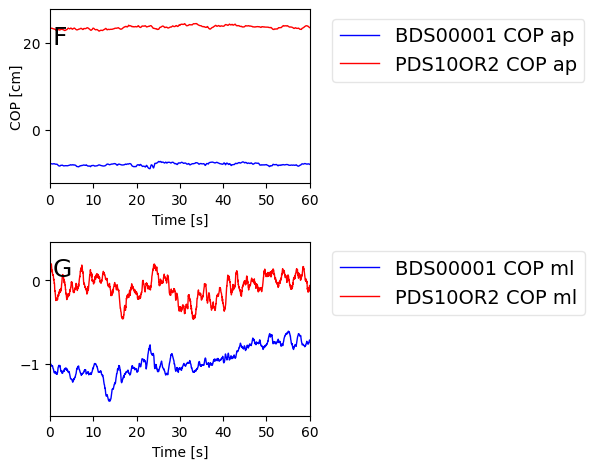

In [63]:
# Criar os gráficos
fig, (ax5, ax6) = plt.subplots(2, 1)

# Plotar os dados de grf1 em azul
ax5.plot(grf1['Time'], grf1['COPx']*100, 'b', linewidth=1.0, label='BDS00001 COP ap')
ax6.plot(grf1['Time'], grf1['COPy']*100, 'b', linewidth=1.0, label='BDS00001 COP ml')

# Plotar os dados de grf2 em vermelho
ax5.plot(grf2['Time'], grf2['COPx']*100, 'r', linewidth=1.0, label='PDS10OR2 COP ap')
ax6.plot(grf2['Time'], grf2['COPy']*100, 'r', linewidth=1.0, label='PDS10OR2 COP ml')

# Configurações do gráfico
ax5.margins(y=0.1)
ax5.set_xlim([0, 60])
ax5.set_xlabel('Time [s]')
ax5.set_ylabel('COP [cm]')
ax5.locator_params(axis='y', nbins=3)
ax5.yaxis.set_label_coords(-.1, 0.5)
ax5.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=.5)
ax5.text(0.01, 0.8, 'F', transform=ax5.transAxes, fontsize=18)

ax6.margins(y=0.1)
ax6.set_xlim([0, 60])
ax6.set_xlabel('Time [s]')
ax6.locator_params(axis='y', nbins=4)
ax6.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=.5)
ax6.text(0.01, 0.8, 'G', transform=ax6.transAxes, fontsize=18)

plt.tight_layout()
plt.show()